In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sys.path.append("..")
sys.path.append("../protein_transformer")
sns.set_style("whitegrid")

In [2]:
# results from the run train01
train_path = Path("../runs/train01")

In [3]:
# train and valid loss
train_df = pd.read_csv(train_path / "results.csv")
train_df.head()

,Epoch,train_loss,val_loss,val_accuracy,val_auc,val_precision,val_recall,val_f1
0,1,0.690438,0.675935,0.654545,0.787037,0.752893,0.654545,0.620611
1,2,0.677949,0.664414,0.672727,0.794974,0.690390,0.672727,0.666569
2,3,0.666167,0.653774,0.654545,0.822751,0.716913,0.654545,0.624604
3,4,0.663577,0.648009,0.672727,0.805556,0.730536,0.672727,0.648182
4,5,0.657697,0.642099,0.654545,0.817460,0.716913,0.654545,0.624604


Text(0, 0.5, 'Loss')

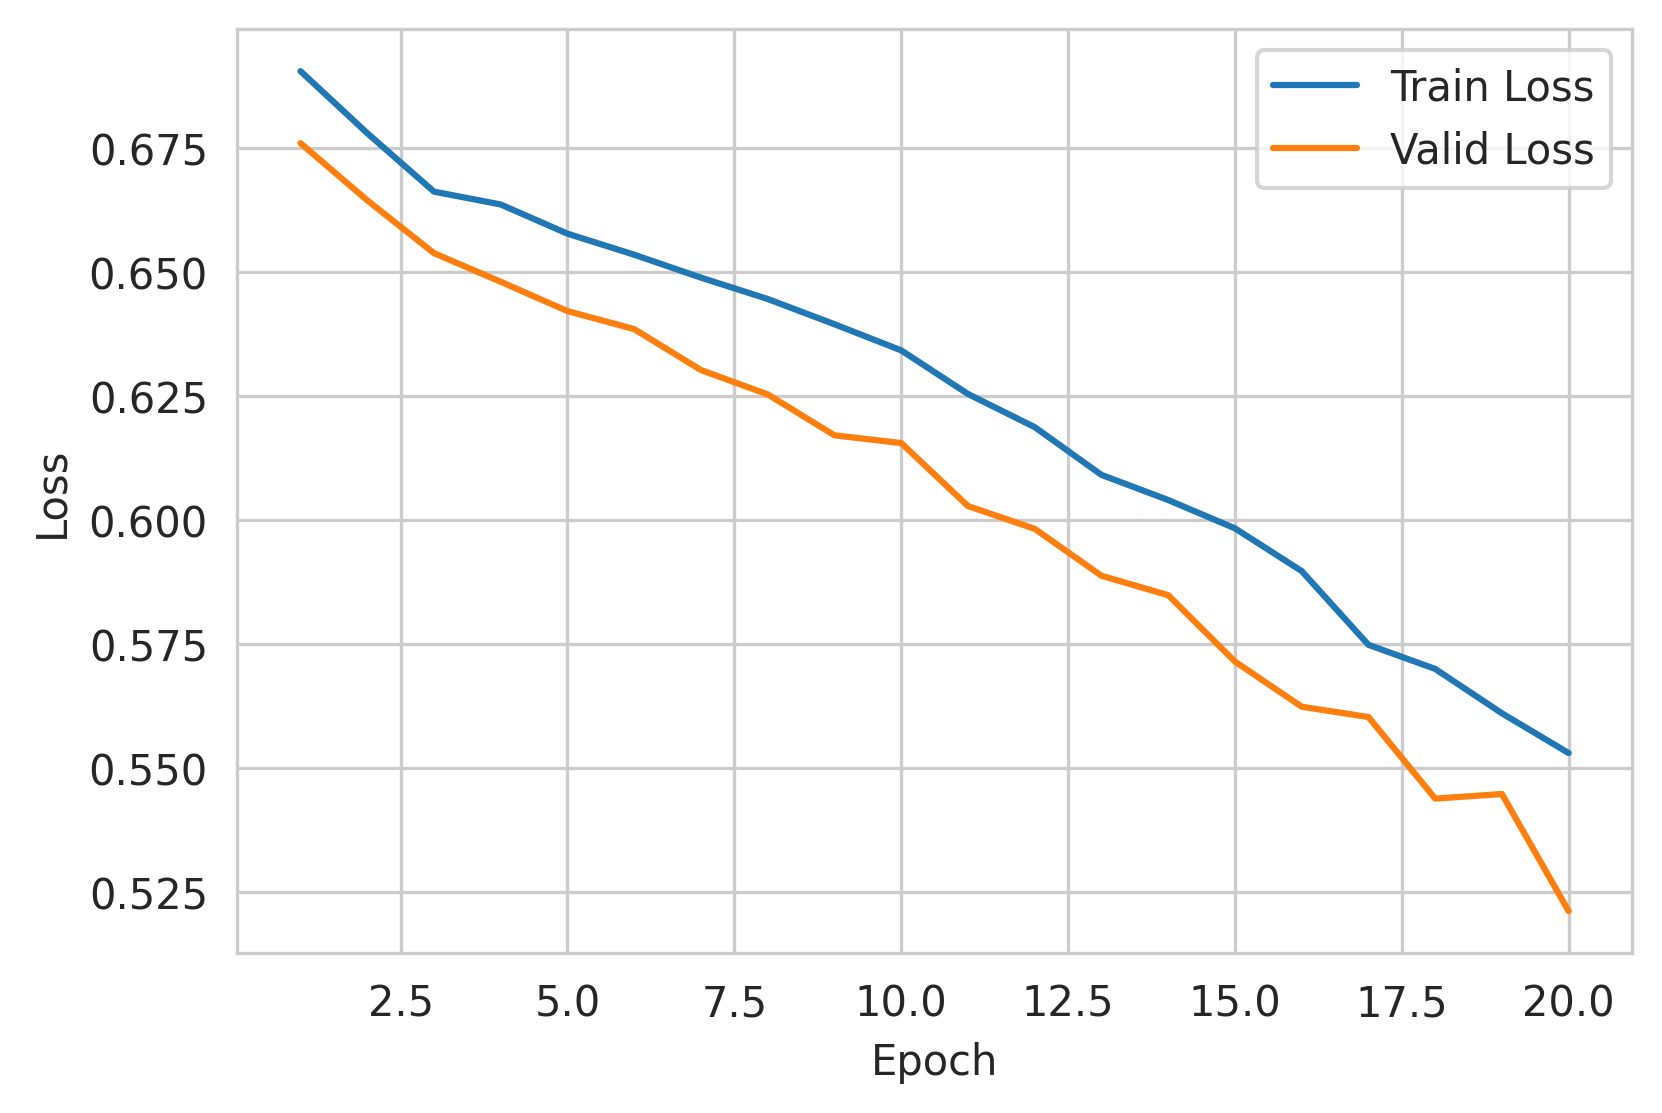

In [4]:
fig = plt.figure(figsize=(6, 4), dpi=300)
sns.lineplot(data=train_df, x="Epoch", y="train_loss", label="Train Loss")
sns.lineplot(data=train_df, x="Epoch", y="val_loss", label="Valid Loss")
plt.ylabel("Loss")

In [5]:
from protein_transformer.evaluate import evaluate
from sklearn.metrics import RocCurveDisplay, auc

In [6]:
y_true, y_pred, y_prob, metrics = evaluate(
    run_dir="../runs/tune01", dataset_loc="../data/bcr_test.parquet"
)

[Text(0.5, 0, 'False Positive Rate'),
 Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 1.0, 'ROC Curve for Antibody Classifier on the Hold-Out Test Set')]

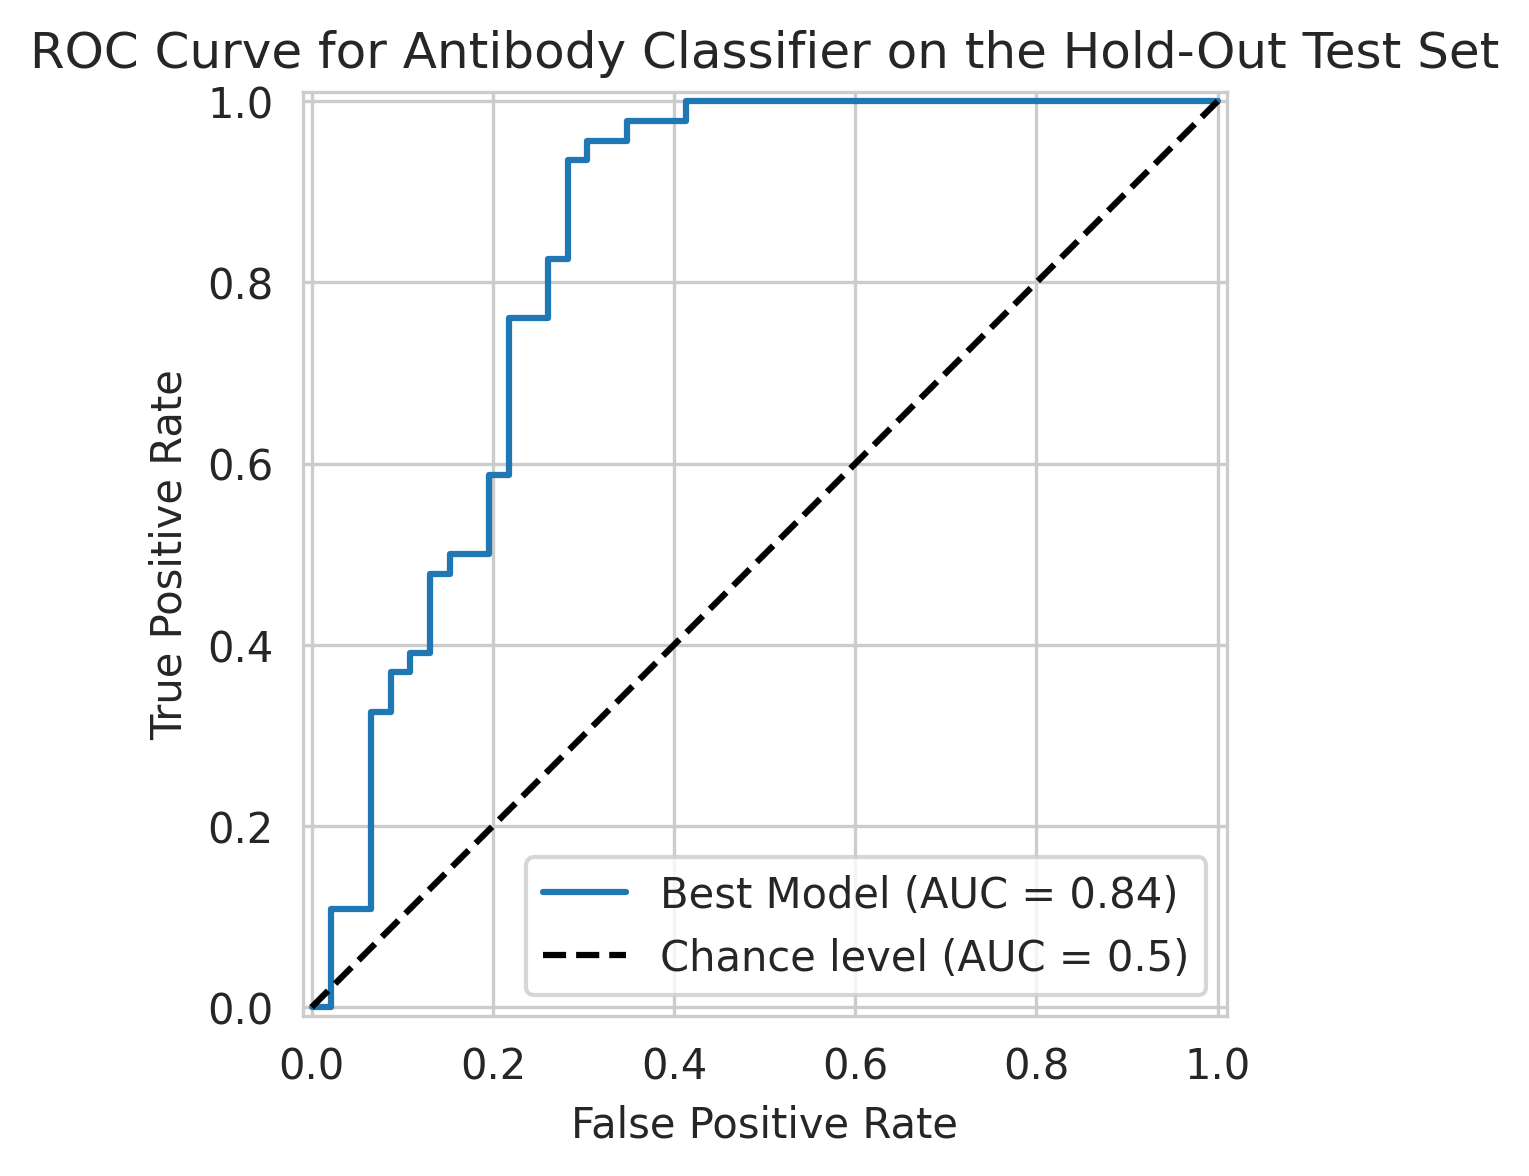

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
display = RocCurveDisplay.from_predictions(
    y_true, y_prob[:, 1], name="Best Model", plot_chance_level=True, ax=ax
)
display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve for Antibody Classifier on the Hold-Out Test Set",
)

In [8]:
import json
from sklearn.metrics import ConfusionMatrixDisplay

sns.set_style("white")

In [9]:
with open("../runs/tune01/classes.json", "r") as f:
    classes = json.load(f)
classes

{'0': 'HIV-1', '1': 'SARS-CoV2'}

In [10]:
# labels from classes dict
labels = [classes[str(i)] for i in range(len(classes))]

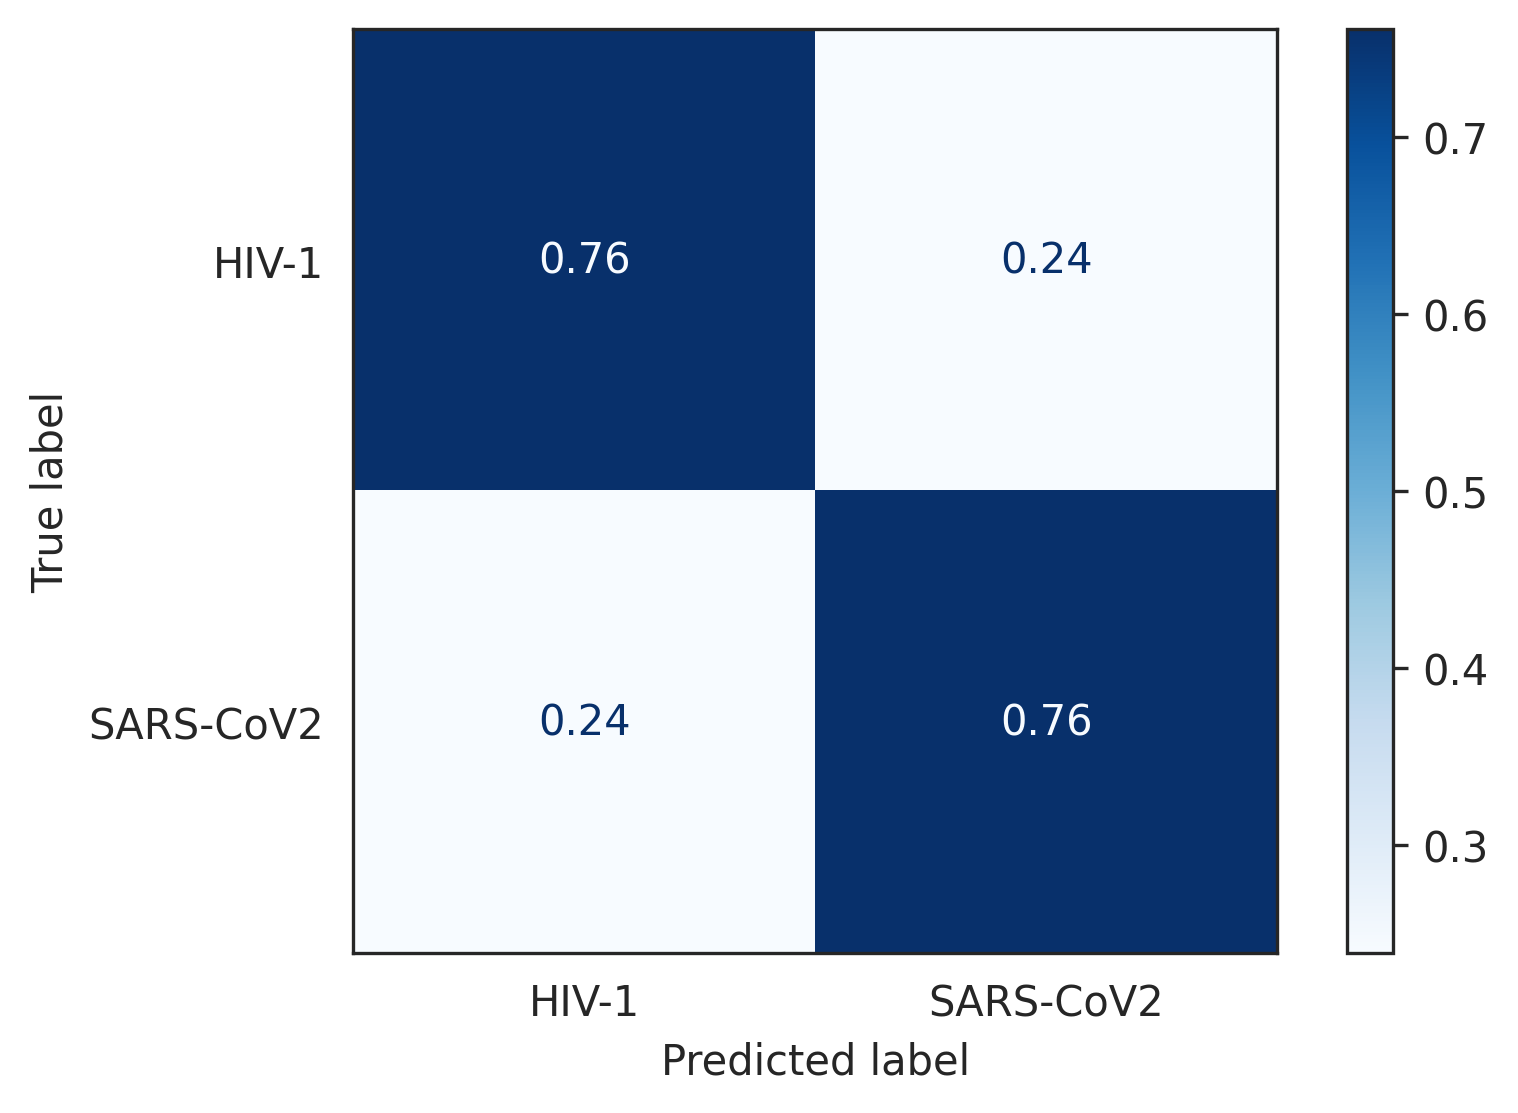

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, display_labels=labels, cmap=plt.cm.Blues, normalize="true", ax=ax
)